In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
import numpy as np

In [3]:
(train_images, train_labels), _ = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [8]:
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))],
    axis=1)

In [9]:
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))],
    axis=1)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [15]:
model=get_model()

In [16]:
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,)

Epoch 1/10
375/375 [==============================] - 4s 5ms/step - loss: 0.6377 - accuracy: 0.8096 - val_loss: 0.3493 - val_accuracy: 0.8892
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2526 - accuracy: 0.9213 - val_loss: 0.2564 - val_accuracy: 0.9205
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1631 - accuracy: 0.9495 - val_loss: 0.1574 - val_accuracy: 0.9513
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1142 - accuracy: 0.9640 - val_loss: 0.1269 - val_accuracy: 0.9613
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0824 - accuracy: 0.9737 - val_loss: 0.1611 - val_accuracy: 0.9523
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0627 - accuracy: 0.9794 - val_loss: 0.1419 - val_accuracy: 0.9610
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.1296 - val_accuracy: 0.9652
Epoch 

In [17]:
model=get_model()

In [18]:
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2858 - accuracy: 0.9175 - val_loss: 0.1410 - val_accuracy: 0.9603
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1182 - accuracy: 0.9654 - val_loss: 0.1095 - val_accuracy: 0.9675
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0790 - accuracy: 0.9764 - val_loss: 0.0902 - val_accuracy: 0.9733
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0565 - accuracy: 0.9835 - val_loss: 0.0976 - val_accuracy: 0.9704
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0425 - accuracy: 0.9874 - val_loss: 0.0861 - val_accuracy: 0.9745
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0881 - val_accuracy: 0.9735
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0242 - accuracy: 0.9927 - val_loss: 0.0852 - val_accuracy: 0.9768
Epoch 

In [19]:
import matplotlib.pyplot as plt

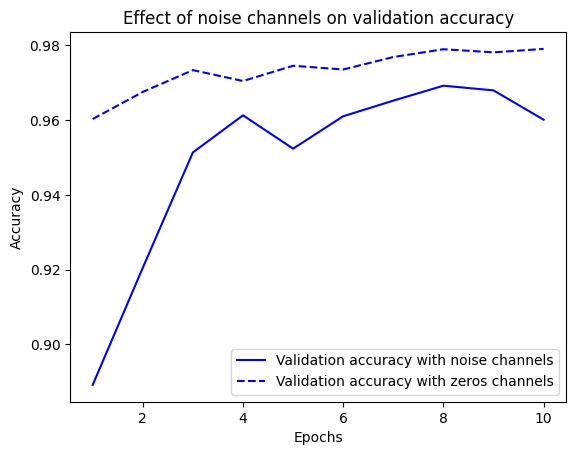

In [20]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs=range(1, 11)
plt.plot(epochs, val_acc_noise, 'b-',
        label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--',
        label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
(train_images, train_labels), _ = mnist.load_data()

In [22]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [23]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

In [24]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation = 'softmax')
])

In [26]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
model.fit(train_images, random_train_labels,
         epochs=100,
         batch_size=128,
         validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 6ms/step - loss: 2.3169 - accuracy: 0.1034 - val_loss: 2.3068 - val_accuracy: 0.1080
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3001 - accuracy: 0.1151 - val_loss: 2.3133 - val_accuracy: 0.1032
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2916 - accuracy: 0.1298 - val_loss: 2.3199 - val_accuracy: 0.0978
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2768 - accuracy: 0.1412 - val_loss: 2.3292 - val_accuracy: 0.0960
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2607 - accuracy: 0.1540 - val_loss: 2.3369 - val_accuracy: 0.1015
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2371 - accuracy: 0.1715 - val_loss: 2.3539 - val_accuracy: 0.1019
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2141 - accuracy: 0.1853 - val_loss: 2.3699 - val_accuracy: 0.1010